In [1]:
import json
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import scipy
import qiskit
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import (
    CU3Gate,
    U3Gate,
    HGate,
    IGate,
    SGate,
    SdgGate,
    TGate,
    TdgGate,
    XGate,
    YGate,
    ZGate,
    CXGate,
    CZGate,
    CYGate,
    CHGate,
    SXGate,
    RXGate,
    RYGate,
    RZGate,
    CRXGate,
    CRYGate,
    CRZGate
)
output_notebook()

Loading BokehJS ...

## Searching the bit-flip code, can obtain perfect results:

dict_keys(['NUM_QUBITS', 'Pool', 'Search_Param', 'circ_param_init', 'prob_param_init', 'k', 'op_list', 'loss_list', 'prob_params_list', 'loss_std', 'final_prob_param', 'all_circuit_param', 'fine_tune_res'])
dict_keys(['tuned_circ_param', 'tuned_op_list', 'fine_tune_loss_list'])
Ops after search:
['(CU3Gate, [0, 1], [3.174588, 1.1762933, -1.1044861])', '(CU3Gate, [0, 2], [-3.208773, 1.9462981, -0.5304314])']
Ops after fine tune:
['(CU3Gate, [0, 1], [3.1410732, 1.285786, -1.5177985])', '(CU3Gate, [0, 2], [3.1422412, -1.2851771, -1.3310162])']


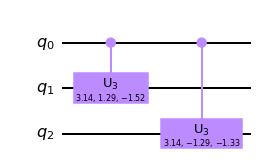

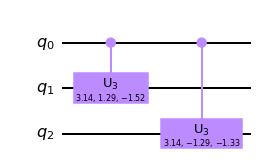

In [2]:
res_filename = "20210726-064549_BIT_FLIP_QEC_CODE_SEARCH.json"
with open(res_filename, 'r') as f:
    res = json.load(f)
print(res.keys())
print(res['fine_tune_res'].keys())
print("Ops after search:")
print(res['op_list'])
print("Ops after fine tune:")
print(res['fine_tune_res']['tuned_op_list'])
ops =res['fine_tune_res']['tuned_op_list']
qc = qiskit.QuantumCircuit(3)
for c in ops:
    c = eval(c)
    gate_obj = c[0](*c[2])
    qc.append(gate_obj, c[1])
search_loss_list_without_nan = [c for c in res['loss_list'] if not np.isnan(c)]
qc.draw(output = 'mpl')

In [3]:
search_loss_p = figure(plot_width=700, plot_height=500, title="Search Loss Plot, Bit-Flip Code")
search_loss_p.line(list(range(1,len(search_loss_list_without_nan)+1)), search_loss_list_without_nan, line_width=1)
search_loss_p.xaxis.axis_label = "Epoch"
search_loss_p.yaxis.axis_label = "Batch Avg Loss"
show(search_loss_p)

In [4]:
fine_tune_loss = res['fine_tune_res']['fine_tune_loss_list']
fine_tune_loss_p = figure(plot_width=700, plot_height=500, title="Fine-Tune Loss Plot, Bit-Flip Code")
fine_tune_loss_p.line(list(range(1, len(fine_tune_loss)+1)), fine_tune_loss, line_width=1)
fine_tune_loss_p.xaxis.axis_label = "Epoch"
fine_tune_loss_p.yaxis.axis_label = "Loss"
show(fine_tune_loss_p)

## Searching the 5-bit code: easily trapped in some local minima

In [5]:
res_filename2 = "20210721-0155_QEC_CODE_SEARCH.json"
with open(res_filename2, 'r') as f:
    res2 = json.load(f)
print(res2.keys())
print(res2['fine_tune_res'].keys())
print("Ops after search:")
print(res2['op_list'])
print("Ops after fine tune:")
print(res2['fine_tune_res']['tuned_op_list'])
ops2 =res2['fine_tune_res']['tuned_op_list']
qc2 = qiskit.QuantumCircuit(5)
for c in ops2:
    c = eval(c)
    gate_obj = c[0](*c[2])
    qc2.append(gate_obj, c[1])
search_loss_list_without_nan2 = [c for c in res2['loss_list'] if not np.isnan(c)]
qc2.draw(output = 'mpl')

FileNotFoundError: [Errno 2] No such file or directory: '20210721-0155_QEC_CODE_SEARCH.json'

In [ ]:
search_loss_p = figure(plot_width=700, plot_height=500, title="Search Loss Plot, 5-Bit Code, 300 samples")
search_loss_p.line(list(range(1,len(search_loss_list_without_nan2)+1)), search_loss_list_without_nan2, line_width=1)
search_loss_p.xaxis.axis_label = "Epoch"
search_loss_p.yaxis.axis_label = "Batch Avg Loss"
show(search_loss_p)

In [ ]:
fine_tune_loss = res2['fine_tune_res']['fine_tune_loss_list']
fine_tune_loss_p = figure(plot_width=700, plot_height=500, title="Fine-Tune Loss Plot, 5-Bit Code")
fine_tune_loss_p.line(list(range(1, len(fine_tune_loss)+1)), fine_tune_loss, line_width=1)
fine_tune_loss_p.xaxis.axis_label = "Epoch"
fine_tune_loss_p.yaxis.axis_label = "Loss"
show(fine_tune_loss_p)

In [ ]:
res_filename3 = "20210721-1611_QEC_CODE_SEARCH.json"
with open(res_filename3, 'r') as f:
    res3 = json.load(f)
print(res3.keys())
print(res3['fine_tune_res'].keys())
print("Ops after search:")
print(res3['op_list'])
print("Ops after fine tune:")
print(res3['fine_tune_res']['tuned_op_list'])
ops3 =res3['fine_tune_res']['tuned_op_list']
qc3 = qiskit.QuantumCircuit(5)
for c in ops3:
    c = eval(c)
    gate_obj = c[0](*c[2])
    qc3.append(gate_obj, c[1])
search_loss_list_without_nan3 = [c for c in res3['loss_list'] if not np.isnan(c)]
qc3.draw(output = 'mpl')

In [ ]:
search_loss_p = figure(plot_width=700, plot_height=500, title="Search Loss Plot, 5-Bit Code, Noise in Circuit Parameters, 600 Samples")
search_loss_p.line(list(range(1,len(search_loss_list_without_nan3)+1)), search_loss_list_without_nan3, line_width=1)
search_loss_p.xaxis.axis_label = "Epoch"
search_loss_p.yaxis.axis_label = "Batch Avg Loss"
show(search_loss_p)

In [ ]:
fine_tune_loss = res3['fine_tune_res']['fine_tune_loss_list']
fine_tune_loss_p = figure(plot_width=700, plot_height=500, title="Fine-Tune Loss Plot, 5-Bit Code")
fine_tune_loss_p.line(list(range(1, len(fine_tune_loss)+1)), fine_tune_loss, line_width=1)
fine_tune_loss_p.xaxis.axis_label = "Epoch"
fine_tune_loss_p.yaxis.axis_label = "Loss"
show(fine_tune_loss_p)